In [1]:
from imblearn.under_sampling import RandomUnderSampler
from class_magnesium_not_drop_na import *
from sklearn.preprocessing import LabelEncoder

### С группами

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  3991
Portion of sites:  0.21432790935
Average score:  0.790072140773
Last score:  0.7896998013
Confusion matrix, without normalization
[[14605    25]
 [ 3891   100]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.97  0.03]]


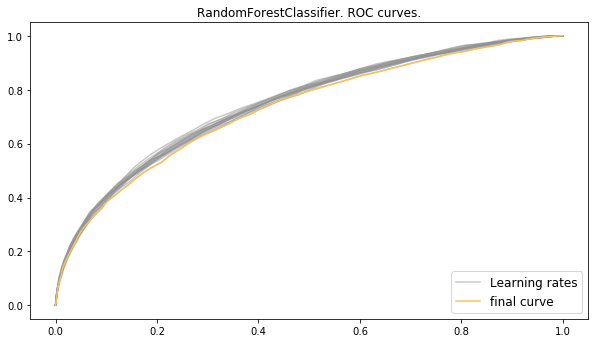

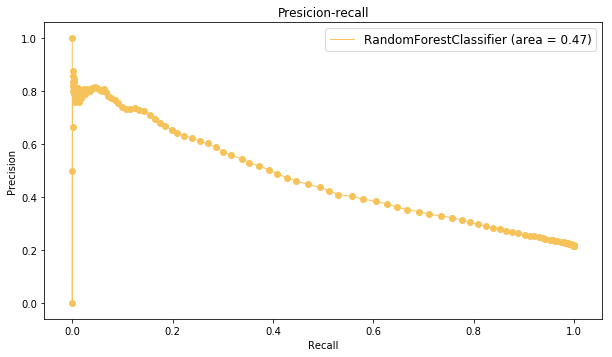

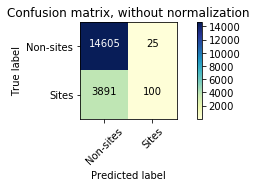

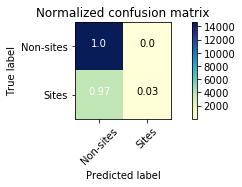

In [2]:
m = Magnesium("set_minresol_N_5_b_b.csv", fold='input files/',colours = ['#f6c35b', '#929292'])
data = m.compute(15, 0.3, reduce_features = False)

C:\Users\tikho\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tikho\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tikho\Anaconda3\lib\site-packages\imblearn\base.py:343: UserWarning: The target type should be binary or multiclass.
  warnings.warn('The target type should be binary or multiclass.')
C:\Users\tikho\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Before:  (62069, 361)
After:  (26606, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  3991
Portion of sites:  0.5
Average score:  0.707157771653
Last score:  0.698195940867
Confusion matrix, without normalization
[[2690 1301]
 [1108 2883]]
Normalized confusion matrix
[[ 0.67  0.33]
 [ 0.28  0.72]]


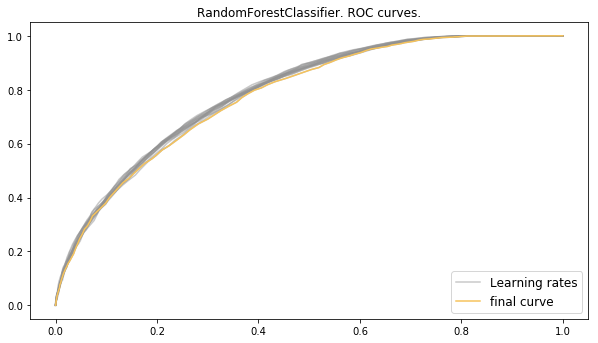

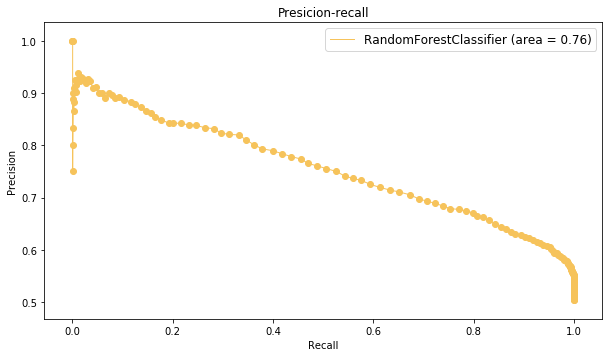

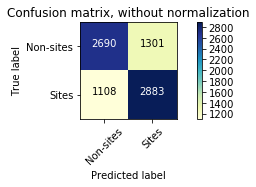

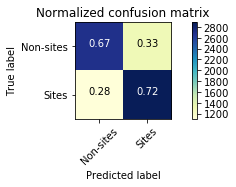

In [3]:
m_rand = Magnesium("set_minresol_N_5_b_b.csv", fold='input files/',colours = ['#f6c35b', '#929292'])
rus = RandomUnderSampler(random_state=42)

data = m_rand.data_numpy
lb_make = LabelEncoder()
data[:,0] = lb_make.fit_transform(data[:,0]).reshape(-1,1)
data, y = rus.fit_sample(m_rand.data_numpy[:,:-1], m_rand.data_numpy[:,-1])

y = np.ravel(np.asarray(y, dtype="int"))
#print(y)
#print(y.shape)
x = data[:,1:]
m_rand.groups = data[:,0]
print('Before: ', m_rand.x.shape)
print('After: ', x.shape)
data_rand = m_rand.fit_predict(15, 0.3, redundant = False, x = x, y = y)

### Без групп

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  3991
Portion of sites:  0.21432790935
Average score:  0.789921772909
Last score:  0.789162773213
Confusion matrix, without normalization
[[14601    29]
 [ 3897    94]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.98  0.02]]


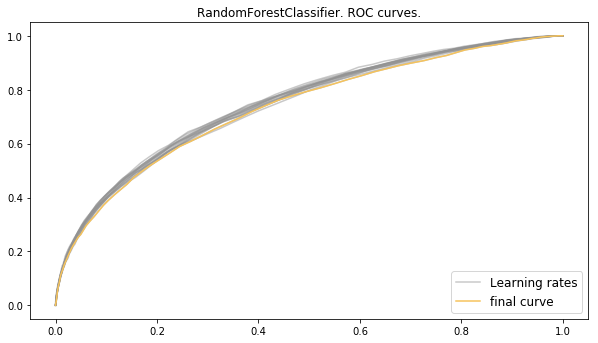

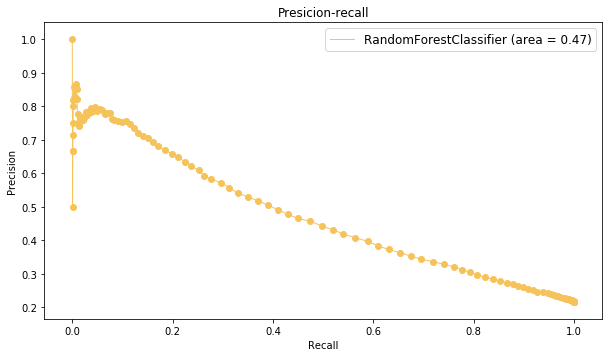

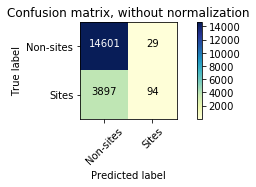

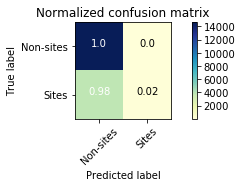

In [4]:
m_out = Magnesium("set_minresol_N_5_b_b.csv", fold='input files/',colours = ['#f6c35b', '#929292'], with_groups = False)
data = m_out.compute(15, 0.3, reduce_features = False)

C:\Users\tikho\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tikho\Anaconda3\lib\site-packages\imblearn\base.py:343: UserWarning: The target type should be binary or multiclass.
  warnings.warn('The target type should be binary or multiclass.')
C:\Users\tikho\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Before:  (62069, 361)
After:  (26606, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  3991
Portion of sites:  0.5
Average score:  0.710047607116
Last score:  0.701578551741
Confusion matrix, without normalization
[[2688 1303]
 [1079 2912]]
Normalized confusion matrix
[[ 0.67  0.33]
 [ 0.27  0.73]]


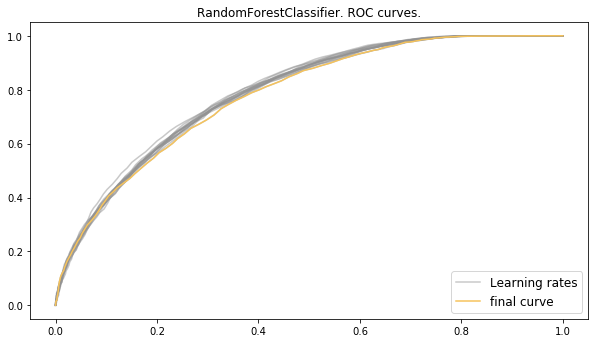

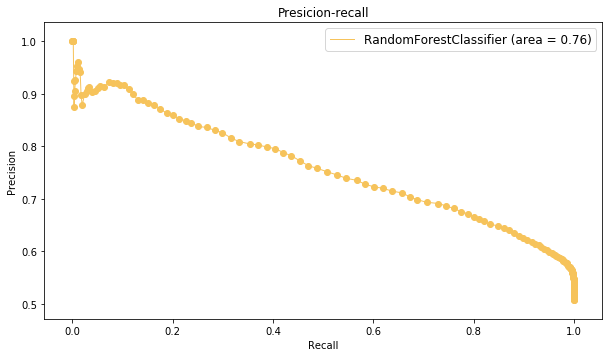

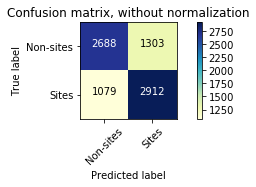

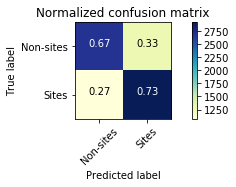

In [5]:
m_rand_out = Magnesium("set_minresol_N_5_b_b.csv", fold='input files/',colours = ['#f6c35b', '#929292'],
                       with_groups = False)
rus = RandomUnderSampler(random_state=42)

#data = m_rand.data_numpy
#lb_make = LabelEncoder()
#data[:,0] = lb_make.fit_transform(data[:,0]).reshape(-1,1)
#data, y = rus.fit_sample(m_rand.data_numpy[:,:-1], m_rand.data_numpy[:,-1])
x, y = rus.fit_sample(m_rand.data_numpy[:,1:-1], m_rand.data_numpy[:,-1])

y = np.ravel(np.asarray(y, dtype="int"))
#print(y)
#print(y.shape)
#x = data[:,1:]
#m_rand_out.groups = data[:,0]
print('Before: ', m_rand.x.shape)
print('After: ', x.shape)
data_rand_out = m_rand_out.fit_predict(15, 0.3, redundant = False, x = x, y = y)

### Валидация

#### С группами

In [6]:
#несбалансированная тренировка
y_pred1 = m.trained_model.predict(m.x[m.indexes[-1]])
y = m.y[m.indexes[-1]]
print('Portion of sites:', np.sum(y==1)/y.shape[0])
print('Amount of sites:', np.sum(y==1))
score1 = m.trained_model.score(m.x[m.indexes[-1]], m.y[m.indexes[-1]])
print(score1)
cnf_matrix1 = confusion_matrix(y, y_pred1)
np.set_printoptions(precision=2)
print(cnf_matrix1)
print('Normalized:')
print(cnf_matrix1.astype('float') / cnf_matrix1.sum(axis=1)[:, np.newaxis])

Portion of sites: 0.21432790935
Amount of sites: 3991
0.7896998013
[[14605    25]
 [ 3891   100]]
Normalized:
[[ 1.    0.  ]
 [ 0.97  0.03]]


In [7]:
#сбалансированная тренировка
y_pred2= m_rand.trained_model.predict(m.x[m.indexes[-1]])
score2 = m_rand.trained_model.score(m.x[m.indexes[-1]], m.y[m.indexes[-1]])
print(score2)
cnf_matrix2 = confusion_matrix(y, y_pred2)
np.set_printoptions(precision=2)
print(cnf_matrix2)
print('Normalized:')
print(cnf_matrix2.astype('float') / cnf_matrix2.sum(axis=1)[:, np.newaxis])

0.73331185221
[[10013  4617]
 [  349  3642]]
Normalized:
[[ 0.68  0.32]
 [ 0.09  0.91]]


#### Без групп

In [8]:
#несбалансированная тренировка
y_pred1_out= m_out.trained_model.predict(m.x[m.indexes[-1]])
score1_out = m_out.trained_model.score(m.x[m.indexes[-1]], m.y[m.indexes[-1]])
print(score2)
cnf_matrix1_out = confusion_matrix(y, y_pred1_out)
np.set_printoptions(precision=2)
print(cnf_matrix1_out)
print('Normalized:')
print(cnf_matrix1_out.astype('float') / cnf_matrix1_out.sum(axis=1)[:, np.newaxis])

0.73331185221
[[14601    29]
 [ 3897    94]]
Normalized:
[[ 1.    0.  ]
 [ 0.98  0.02]]


In [9]:
#сбалансированная тренировка
y_pred2_out= m_rand_out.trained_model.predict(m.x[m.indexes[-1]])
score2_out = m_rand_out.trained_model.score(m.x[m.indexes[-1]], m.y[m.indexes[-1]])
print(score2_out)
cnf_matrix2_out = confusion_matrix(y, y_pred2_out)
np.set_printoptions(precision=2)
print(cnf_matrix2_out)
print('Normalized:')
print(cnf_matrix2_out.astype('float') / cnf_matrix2_out.sum(axis=1)[:, np.newaxis])

0.732560012889
[[9991 4639]
 [ 341 3650]]
Normalized:
[[ 0.68  0.32]
 [ 0.09  0.91]]
